# Obtain all necessary imports

In [3]:
from IPython import get_ipython;   

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
import os

from IPython.display import display, HTML

# Establish single cell simulation parameters

In [4]:
dt=.2
T=int(3600/dt)

V_PLC=1.2
K_PLC=.2
K_5=0.66
K_3=0.4
k_3=0.0

k_1=1.11
k_a=0.08
k_p=0.13
k_2=0.0203
V_SERCA=0.9
K_SERCA=0.1
c_tot=2
beta=.185
tau=12.5
k_i=0.4
tau_p=1

Vpm=0.0
Kpm=0.01
phi=0
v0=0.0008
epsilon=.0
pow_cal=2
j_in=0

v8=.00
kg=0
alpha=0.0

X=np.zeros((4,T,4))
tracker2= np.zeros((1,T))
tracker1= np.zeros((1,T))
tracker3= np.zeros((1,T))
X[0,0,:]=.05
X[1,0,:]=1
X[2,0,:]=(c_tot-.05)/beta
X[3,0,:]=0.5


tau_new_max=1000
kk_tau_new_vector=[.5,.75,1,1.2]
vplc_vector=[.75,.8,1.2,1.6]

N=len(kk_tau_new_vector)

X=np.zeros((4,T,N))
X[0,0,:]=.05
X[1,0,:]=1
X[2,0,:]=(c_tot-.05)/beta
X[3,0,:]=0.5

saveFolderName = './simulationResults/Figure_S2' # The folder where simulation results are to be saved for this notebook
if not os.path.exists(saveFolderName): # Create the folder if it does not yet exist
    os.makedirs(saveFolderName)

# Run the single cell simulation for varying $V_{PLC}$

In [5]:
for j in range(0,4):
    for i in range(1,T):
        c_old=X[0,i-1,j]
        p_old=X[1,i-1,j]
        s_old=X[2,i-1,j]
        r_old=X[3,i-1,j]
        kk_tau_new=1
        V_PLC= vplc_vector[j]

        c_new=c_old+dt*((k_1*(r_old*c_old*p_old/(k_a+c_old)/(k_p+p_old))**3 +k_2 )*(s_old-c_old) -V_SERCA*c_old**2/(c_old**2+ K_SERCA**2) +epsilon*(v0+phi*V_PLC/(k_3+K_5) -Vpm*c_old**2/(c_old**2+ Kpm**2)) )
        p_new=p_old+dt*tau_p*(V_PLC*c_old**pow_cal/(c_old**pow_cal+ K_PLC**pow_cal)  -  K_5*p_old -k_3*p_old*c_old**2/(c_old**2+ K_3**2)  )
        s_new=s_old+dt*(1.0/beta)*( V_SERCA*c_old**2/(c_old**2+ K_SERCA**2)- (k_1*(r_old*c_old*p_old/(k_a+c_old)/(k_p+p_old))**3 +k_2 )*(s_old-c_old) )
        tau_new= tau_new_max * (kk_tau_new**4)/(c_old**4+ kk_tau_new**4)
        r_new=r_old+dt*(1.0/tau_new)*( 1-r_old*(k_i+c_old)/k_i)

        X[0,i,j]=c_new
        X[1,i,j]=p_new
        X[2,i,j]=s_new
        X[3,i,j]=r_new

# Plot the results for varying $V_{PLC}$

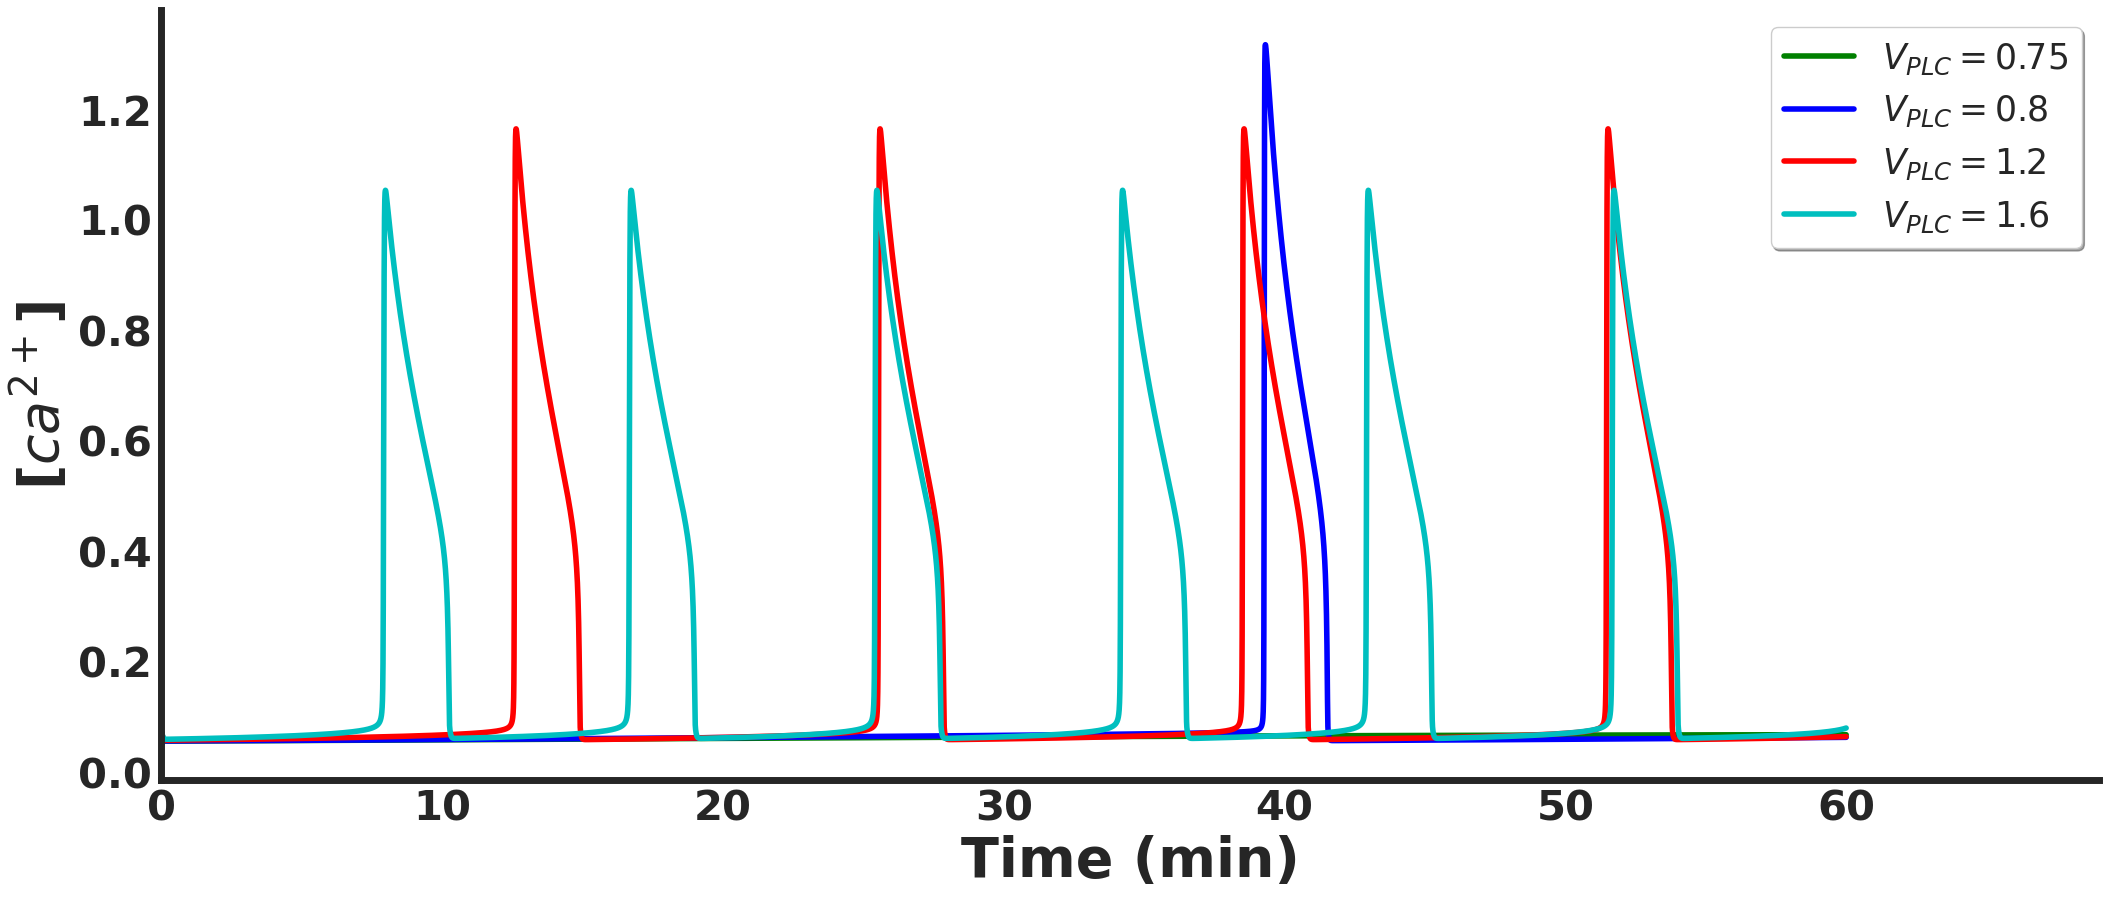

In [6]:
with sns.axes_style("white"):
    legend_properties = {'weight':'bold','size':25}
    fig=plt.figure(figsize=(25,10))
    ax = plt.axes()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    plt.yticks(fontsize=30,fontweight='bold')
    plt.xticks(fontsize=30,fontweight='bold')
    plt.plot(np.arange(0,(T)*dt,dt)/60.0, X[0,:,0] ,'g',linewidth=4,label=r'$V_{PLC}=0.75$' )
    plt.plot(np.arange(0,(T)*dt,dt)/60.0, X[0,:,1] ,'b',linewidth=4,label=r'$V_{PLC}=0.8$' )
    plt.plot(np.arange(0,(T)*dt,dt)/60.0, X[0,:,2] ,'r',linewidth=4,label=r'$V_{PLC}=1.2$' )
    plt.plot(np.arange(0,(T)*dt,dt)/60.0, X[0,:,3] ,'c',linewidth=4,label=r'$V_{PLC}=1.6$' )
    
    plt.xlabel('Time (min)',fontsize=40,fontweight='bold')
    ax.set_ylabel(r'[$ca^{2+}$]',fontsize=40,fontweight='bold')
    ax.legend(loc=1, shadow=True, prop=legend_properties)
    ax.set_xlim([0,69])
    
fig.savefig(saveFolderName + "./Panel_B.pdf",transparent=True)   

# Run the single cell simulation for varying $k_{\tau}$

In [7]:
# Adjusting parameters
V_PLC = 1.2
X=np.zeros((4,T,N))
X[0,0,:]=.05
X[1,0,:]=1
X[2,0,:]=(c_tot-.05)/beta
X[3,0,:]=0.5

for j in range(0,4):
    for i in range(1,T):
        c_old=X[0,i-1,j]
        p_old=X[1,i-1,j]
        s_old=X[2,i-1,j]
        r_old=X[3,i-1,j]
        kk_tau_new=kk_tau_new_vector[j]

        c_new=c_old+dt*((k_1*(r_old*c_old*p_old/(k_a+c_old)/(k_p+p_old))**3 +k_2 )*(s_old-c_old) -V_SERCA*c_old**2/(c_old**2+ K_SERCA**2) +epsilon*(v0+phi*V_PLC/(k_3+K_5) -Vpm*c_old**2/(c_old**2+ Kpm**2)) )
        p_new=p_old+dt*tau_p*(V_PLC*c_old**pow_cal/(c_old**pow_cal+ K_PLC**pow_cal)  -  K_5*p_old -k_3*p_old*c_old**2/(c_old**2+ K_3**2)  )
        s_new=s_old+dt*(1.0/beta)*( V_SERCA*c_old**2/(c_old**2+ K_SERCA**2)- (k_1*(r_old*c_old*p_old/(k_a+c_old)/(k_p+p_old))**3 +k_2 )*(s_old-c_old) )
        tau_new= tau_new_max * (kk_tau_new**4)/(c_old**4+ kk_tau_new**4)
        r_new=r_old+dt*(1.0/tau_new)*( 1-r_old*(k_i+c_old)/k_i)

        X[0,i,j]=c_new
        X[1,i,j]=p_new
        X[2,i,j]=s_new
        X[3,i,j]=r_new

# Plot the results for varying $k_\tau$

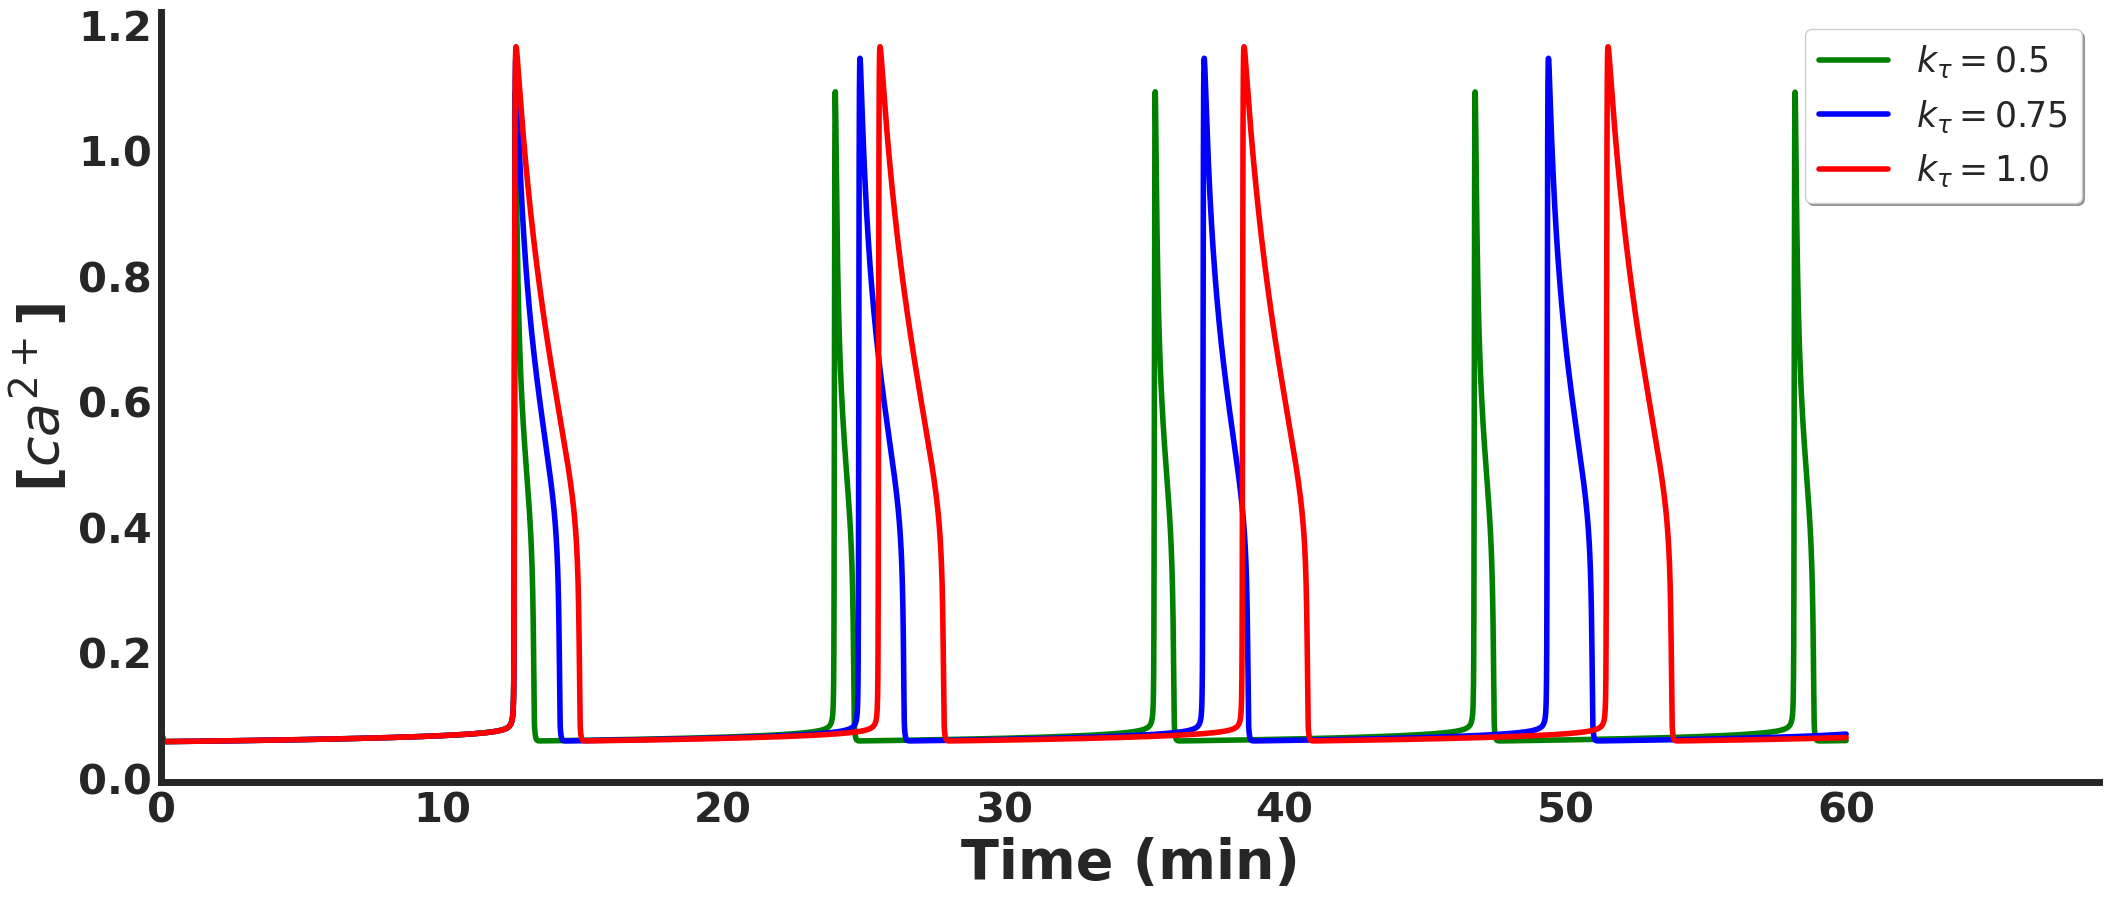

In [8]:
with sns.axes_style("white"):
    legend_properties = {'weight':'bold','size':25}
    fig=plt.figure(figsize=(25,10))
    ax = plt.axes()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    plt.yticks(fontsize=30,fontweight='bold')
    plt.xticks(fontsize=30,fontweight='bold')
    plt.plot(np.arange(0,(T)*dt,dt)/60.0, X[0,:,0] ,'g',linewidth=4,label=r'$k_{\tau}=0.5$' )
    plt.plot(np.arange(0,(T)*dt,dt)/60.0, X[0,:,1] ,'b',linewidth=4,label=r'$k_{\tau}=0.75$' )
    plt.plot(np.arange(0,(T)*dt,dt)/60.0, X[0,:,2] ,'r',linewidth=4,label=r'$k_{\tau}=1.0$' )
    
    plt.xlabel('Time (min)',fontsize=40,fontweight='bold')
    ax.set_ylabel(r'[$ca^{2+}$]',fontsize=40,fontweight='bold')
    ax.legend(loc=1, shadow=True, prop=legend_properties)
    ax.set_xlim([0,69])
    
fig.savefig(saveFolderName + "./Panel_A.pdf",transparent=True) 